In [4]:
import pandas as pd

# Load the specific file you uploaded
df = pd.read_csv('HRDataset_v14.csv')

# Display the first 5 rows to make sure it worked
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
# Check how many missing values exist in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource    

In [6]:
# --- STEP 1: REMOVE DUPLICATES ---
# It is best to do this first before filling values
initial_count = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_count - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [7]:
# --- STEP 2: HANDLE MISSING VALUES ---

# A. For columns where 'NaN' means the event hasn't happened (like Termination)
# We fill these with a placeholder or 'Active'
df['DateofTermination'] = df['DateofTermination'].fillna('Still Employed')

In [8]:
# B. For ManagerID and ManagerName
# These are often missing in this dataset; we fill with a placeholder
df['ManagerID'] = df['ManagerID'].fillna(0)
df['ManagerName'] = df['ManagerName'].fillna('Unknown')

In [9]:
# C. For specific HR metrics like Performance Score or Satisfaction
# We fill with the most common value (mode) or 'N/A'
df['PerformanceScore'] = df['PerformanceScore'].fillna(df['PerformanceScore'].mode()[0])

In [10]:
# --- STEP 3: CLEAN TEXT DATA ---
# Remove any accidental leading/trailing spaces in column names or string data
df.columns = df.columns.str.strip()
df['Employee_Name'] = df['Employee_Name'].str.strip()

print("Data Cleaning Complete!")

Data Cleaning Complete!


In [11]:
# Final check for missing values
print(df.isnull().sum())

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [12]:
# Check the first few rows of the cleaned data
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [13]:
# General statistics for numerical columns
print("Statistical Summary of Salaries and Engagement:")
print(df[['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences']].describe())

Statistical Summary of Salaries and Engagement:
              Salary  EngagementSurvey  EmpSatisfaction    Absences
count     311.000000        311.000000       311.000000  311.000000
mean    69020.684887          4.110000         3.890675   10.237942
std     25156.636930          0.789938         0.909241    5.852596
min     45046.000000          1.120000         1.000000    1.000000
25%     55501.500000          3.690000         3.000000    5.000000
50%     62810.000000          4.280000         4.000000   10.000000
75%     72036.000000          4.700000         5.000000   15.000000
max    250000.000000          5.000000         5.000000   20.000000


In [14]:
# Check the distribution of recruitment sources
print("\nRecruitment Source Breakdown:")
print(df['RecruitmentSource'].value_counts())


Recruitment Source Breakdown:
RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


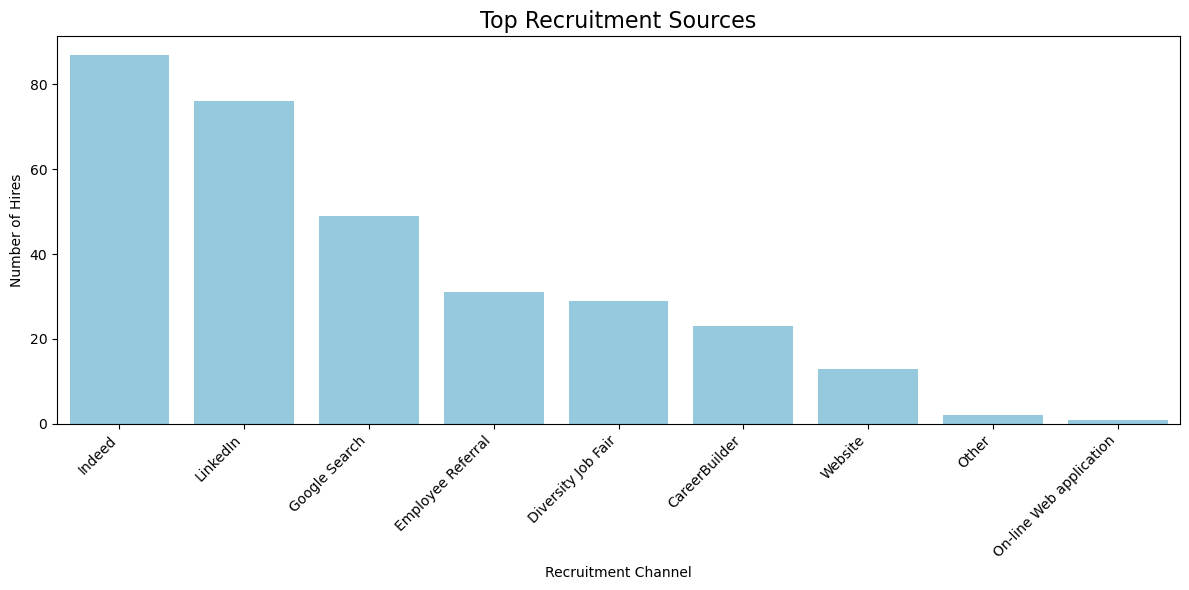

In [28]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean the data (Removes spaces that cause multiple bars for one category)
df['RecruitmentSource'] = df['RecruitmentSource'].str.strip()

# 2. Group the data manually (This makes it easier for the plotting library)
source_counts = df['RecruitmentSource'].value_counts().reset_index()
source_counts.columns = ['Source', 'Count']

# 3. Create the Plot
plt.figure(figsize=(12, 6))

# Use the most basic arguments to avoid errors
sns.barplot(data=source_counts, x='Source', y='Count', color='skyblue')

# 4. Formatting
plt.title('Top Recruitment Sources', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Hires')
plt.xlabel('Recruitment Channel')

# Ensure everything fits
plt.tight_layout()
plt.show()

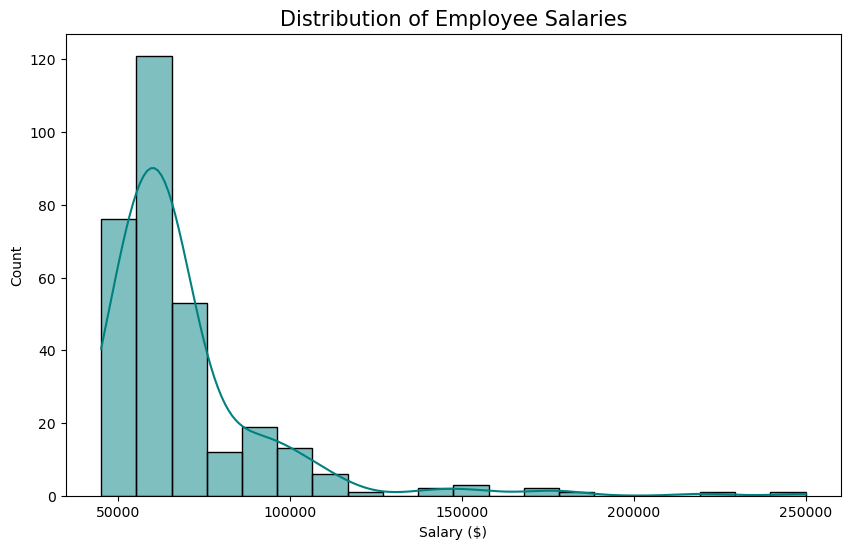

In [29]:
plt.figure(figsize=(10, 6))
# Histogram to see the spread of salaries
sns.histplot(df['Salary'], bins=20, kde=True, color='teal')
plt.title('Distribution of Employee Salaries', fontsize=15)
plt.xlabel('Salary ($)')
plt.show()

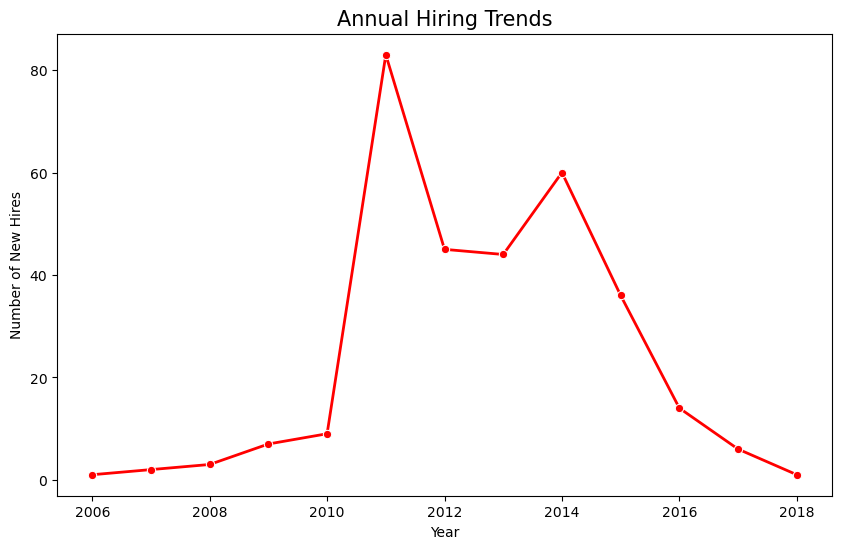

In [30]:
# Convert DateofHire to datetime and extract the year
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['YearOfHire'] = df['DateofHire'].dt.year

# Plot hiring count by year
plt.figure(figsize=(10, 6))
hiring_trend = df['YearOfHire'].value_counts().sort_index()
sns.lineplot(x=hiring_trend.index, y=hiring_trend.values, marker='o', linewidth=2, color='red')
plt.title('Annual Hiring Trends', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of New Hires')
plt.show()